In [1]:
# Funktion zum Laden des Datensets

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
# Daten und Metadaten sind in einem "Bunch"-Objekt organisiert

type(digits)

sklearn.utils._bunch.Bunch

In [3]:
# dieser Bunch hat folgende Attribute:

dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
# Beschreibung

print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [5]:
# die eigentlichen Daten sind in einem numpy-Array angelegt

type(digits.data)

numpy.ndarray

In [6]:
# das schauen wir uns an:

digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [7]:
# Dimension der Matrix

digits.data.shape

(1797, 64)

In [8]:
# Typ der Target-Attribute, ebenfalls ein numpy-array

type(digits.target)

numpy.ndarray

In [9]:
# Dimension. hier nur eine

digits.target.shape

(1797,)

In [10]:
# auch anschauen: jder Wert entspricht der geschriebenen Nummer

digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [11]:
# Attribut target_names: hier wird normalerweiser jeder Zahl in target ein Name zugeordnet. 
# Da es sich heir aber tatsächlich um die Zahlen 0-9 handelt, ist das nicht nötig.

digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
# Attrubut images

len(digits.images)

1797

In [13]:
# erstes Bild anschauen

digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [14]:
# Zehntes Bild anschauen

digits.images[9]

array([[ 0.,  0., 11., 12.,  0.,  0.,  0.,  0.],
       [ 0.,  2., 16., 16., 16., 13.,  0.,  0.],
       [ 0.,  3., 16., 12., 10., 14.,  0.,  0.],
       [ 0.,  1., 16.,  1., 12., 15.,  0.,  0.],
       [ 0.,  0., 13., 16.,  9., 15.,  2.,  0.],
       [ 0.,  0.,  0.,  3.,  0.,  9., 11.,  0.],
       [ 0.,  0.,  0.,  0.,  9., 15.,  4.,  0.],
       [ 0.,  0.,  9., 12., 13.,  3.,  0.,  0.]])

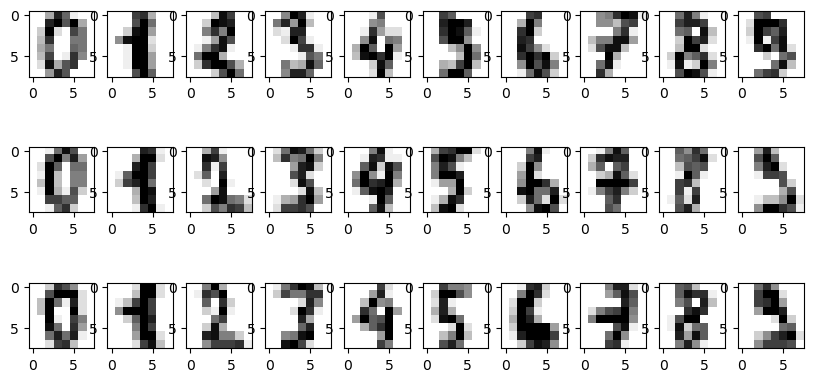

In [15]:
# mit matplotlib anzeigen lassen

import matplotlib.pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(3, 10, figsize=(10, 5))
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img, cmap=plt.cm.gray_r)

plt.show()

In [16]:
# Afteilung des Datensets (genauer: die Attribute data und target) in Trainigsset (75%) und Testset (25%) 
# X = Variablen der Datenmatrix, y = für den Target-Vektor

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    digits['data'], digits['target'], random_state=1)


In [17]:
# Maße der zweidimensionalen Trainingsdaten-Matrix

X_train.shape

(1347, 64)

In [18]:
# Maße der zweidimensionalen Testdaten-Matrix

X_test.shape

(450, 64)

In [19]:
# Länge Trainigsvektor = Anzahl Zeilen der Trainigsmatrix

y_train.shape

(1347,)

In [20]:
# Länge Testvektor = Anzahl Zeilen Testmatrix

y_test.shape

(450,)

In [21]:
# Laden des k-Nearest-Neighbor-Klassifizierer 

from sklearn.neighbors import KNeighborsClassifier

In [22]:
# davon ein Objekt erzeugen. Hier kann die Anzahl der zu betrachtenden Nachbarn angegeben werden

knn_clf = KNeighborsClassifier(n_neighbors=1)

In [23]:
# Trainieren des Klassifikatos mit den Trainigsdaten
# in scikit-learn immer die Methode "fit" (unabhängig vom Klassifikator)

knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [24]:
# "predict" gibt uns die Avoraussage

knn_clf.predict(X_test)

array([1, 5, 0, 7, 1, 0, 6, 1, 5, 4, 9, 2, 7, 8, 4, 6, 9, 3, 7, 4, 7, 1,
       8, 6, 0, 9, 6, 1, 3, 7, 5, 9, 8, 3, 2, 8, 8, 1, 1, 0, 7, 9, 0, 0,
       8, 7, 2, 7, 4, 3, 4, 3, 4, 0, 4, 7, 0, 5, 5, 5, 2, 1, 7, 0, 5, 1,
       8, 3, 3, 4, 0, 3, 7, 4, 3, 4, 2, 9, 7, 3, 2, 5, 3, 4, 1, 5, 5, 2,
       9, 2, 2, 2, 2, 7, 0, 8, 1, 7, 4, 2, 3, 8, 2, 3, 3, 0, 2, 9, 3, 2,
       3, 2, 8, 1, 1, 9, 1, 2, 0, 4, 8, 5, 4, 4, 7, 6, 7, 6, 6, 1, 7, 5,
       6, 3, 8, 3, 7, 1, 8, 5, 3, 4, 7, 8, 5, 0, 6, 0, 6, 3, 7, 6, 5, 6,
       2, 2, 2, 3, 0, 7, 6, 5, 6, 4, 1, 0, 6, 0, 6, 4, 0, 9, 3, 8, 1, 2,
       3, 1, 9, 0, 7, 6, 2, 9, 3, 5, 3, 4, 6, 3, 3, 7, 4, 9, 2, 7, 6, 1,
       6, 8, 4, 0, 3, 1, 0, 9, 9, 9, 0, 1, 8, 6, 8, 0, 9, 5, 9, 8, 2, 3,
       5, 3, 0, 8, 7, 4, 0, 3, 3, 3, 6, 3, 3, 2, 9, 1, 6, 9, 0, 4, 2, 2,
       7, 9, 1, 6, 7, 6, 3, 9, 1, 9, 3, 4, 0, 6, 4, 8, 5, 3, 6, 3, 1, 4,
       0, 4, 4, 8, 7, 9, 1, 5, 2, 7, 0, 9, 0, 4, 4, 0, 1, 0, 6, 4, 2, 8,
       5, 0, 2, 6, 0, 1, 8, 2, 0, 9, 5, 6, 7, 0, 5,

In [25]:
# "score" führt Voraussage durch und vergleicht diese mit den tatsächlichen Target-Werten
# Ausgabewert zwischen 0 (schlecht) und 1 (gut)

knn_clf.score(X_test, y_test)

0.9888888888888889

## mit 3 Nachbarn:

In [32]:
knn_clf_3 = KNeighborsClassifier(n_neighbors=3)
knn_clf_3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [33]:
knn_clf_3.predict(X_test)

array([1, 5, 0, 7, 1, 0, 6, 1, 5, 4, 9, 2, 7, 8, 4, 6, 9, 3, 7, 4, 7, 1,
       8, 6, 0, 9, 6, 1, 3, 7, 5, 9, 8, 3, 2, 8, 8, 1, 1, 0, 7, 9, 0, 0,
       8, 7, 2, 7, 4, 3, 4, 3, 4, 0, 4, 7, 0, 5, 5, 5, 2, 1, 7, 0, 5, 1,
       8, 3, 3, 4, 0, 3, 7, 4, 3, 4, 2, 9, 7, 3, 2, 5, 3, 4, 1, 5, 5, 2,
       9, 2, 2, 2, 2, 7, 0, 8, 1, 7, 4, 2, 3, 8, 2, 3, 3, 0, 2, 9, 9, 2,
       3, 2, 8, 1, 1, 9, 1, 2, 0, 4, 8, 5, 4, 4, 7, 6, 7, 6, 6, 1, 7, 5,
       6, 3, 8, 3, 7, 1, 8, 5, 3, 4, 7, 8, 5, 0, 6, 0, 6, 3, 7, 6, 5, 6,
       2, 2, 2, 3, 0, 7, 6, 5, 6, 4, 1, 0, 6, 0, 6, 4, 0, 9, 3, 8, 1, 2,
       3, 1, 9, 0, 7, 6, 2, 9, 3, 5, 3, 4, 6, 3, 3, 7, 4, 9, 2, 7, 6, 1,
       6, 8, 4, 0, 3, 1, 0, 9, 9, 9, 0, 1, 8, 6, 8, 0, 9, 5, 9, 8, 2, 3,
       5, 3, 0, 8, 7, 4, 0, 3, 3, 3, 6, 3, 3, 2, 9, 1, 6, 9, 0, 4, 2, 2,
       7, 9, 1, 6, 7, 6, 3, 9, 1, 9, 3, 4, 0, 6, 4, 8, 5, 3, 6, 3, 1, 4,
       0, 4, 4, 8, 7, 9, 1, 5, 2, 7, 0, 9, 0, 4, 4, 0, 1, 0, 6, 4, 2, 8,
       5, 0, 2, 6, 0, 1, 8, 2, 0, 9, 5, 6, 7, 0, 5,

In [34]:
knn_clf_3.score(X_test, y_test)

0.9911111111111112

In [26]:
# Random-Forest-Klassifikator, ebefalls mit fit, predict und score

In [27]:
from sklearn.ensemble import RandomForestClassifier
random_forest_cfl = RandomForestClassifier(random_state=1)
random_forest_cfl.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [28]:
random_forest_cfl.score(X_test, y_test)

0.98

In [29]:
# Multi-Layer-Perceptron (Klassifikation mit einem künstlichen, neuralen Netz)

In [30]:
from sklearn.neural_network import MLPClassifier

In [31]:
mlpc = MLPClassifier(random_state=1)
mlpc.fit(X_train, y_train)

MLPClassifier(random_state=1)

In [32]:
mlpc.score(X_test, y_test)

0.9755555555555555

In [33]:
# Methodenaufrufe direkt verknüpfen:

In [34]:
MLPClassifier(random_state=1, hidden_layer_sizes=(200, 100, 20)).fit(
    X_train, y_train).score(X_test, y_test)

0.9844444444444445